# Let's make matplotlib do math...maybe

First let's import the data and remake one of the figures from the [overview](01_overview.ipynb) notebook. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("http://bit.ly/tcsv19").dropna()

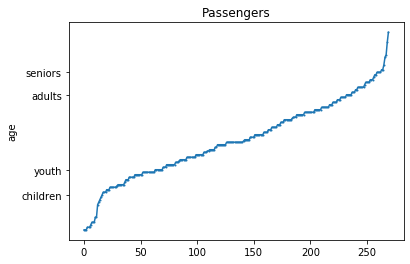

In [6]:
fig, ax = plt.subplots()
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set(title='Passengers', ylabel='age')
_ = ax.set_yticks([15,25, 55, 64])
_ = ax.set_yticklabels(['children', 'youth', 'adults', 'seniors'])

The above figure is a expected cumulative distribution graph. It shows that most passengers are adults, but it is a bit hard to do comparisons, especially at the tales. Instead, we compute the histogram of passenger ages. 

# Let's make Histograms

Here we call the histogram function. Bins = 'auto' tries to find the optimal number of bins using methods described in the numpy [histogram docs](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges). 

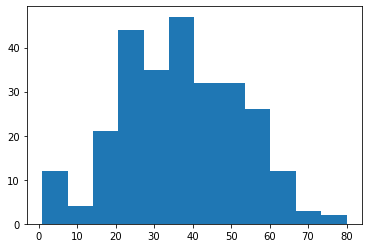

In [7]:
fig, ax = plt.subplots()
(counts, edges, _) = ax.hist('age', bins='auto', data=df)

## Custom Bins to match our CDF

In our line plot, we use bins based on the census-a commonly accepted binning for ages. We can pass those bins into our histogram function via the `bins` parameter. 

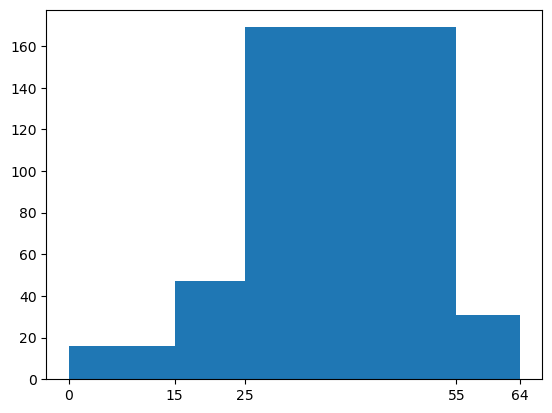

In [2]:
fig, ax = plt.subplots()
(counts, edges, _) = ax.hist('age', bins=[0, 15,25, 55, 64], data=df)
_ = ax.set_xticks([0, 15,25, 55, 64])

### Probability density

By default `ax.hist` returns the number in each bin and the bin edges used.  The bin edges array is 1 longer than the counts because it is all of the left bin edges and then right edge of the last bin.  This is useful when we need to compare absolute values between data sets, but sometime we need to be able to compare the probability density instead.  In the continuous limit, probability density has the condition:

$$1 = \int_{-\infty}^{\infty} P(x)dx$$

and in the discrete case:
$$1 = \sum_{n=0}^N w_n p_n$$

where $w_n$ is the width of the nth bin. We set the `density` parameter to true to plot the density of the data. 

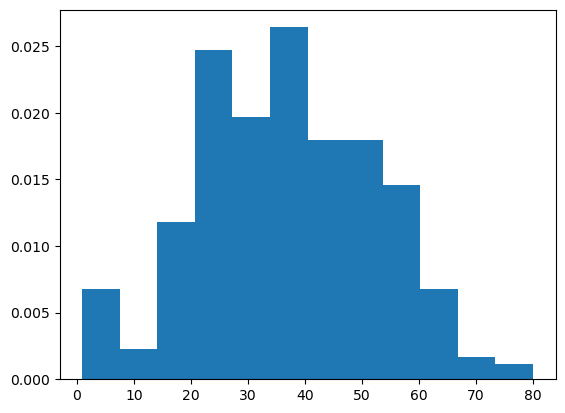

In [4]:
fig, ax = plt.subplots()
# only consider rows where we know the age
(density, edges,_) = ax.hist('age', bins='auto', data=df, density=True)

assert np.sum(np.diff(edges) * density) == 1

## Practice:
1. Make histogram of fares
2. Use the bins defined in the [overview](01_overview.ipynb)

# Use groupby to simplify code

![](../images/groupby.png?)
source: [pandas cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)


Groupby is used to gather all rows that have one observation of one variable in common. For example, a `.groupby('sex')` gathers all the rows where the sex is male and puts them in one dataframe, and puts all the rows where the sex is female into a second dataframe. The next step in a groupby operation is usually to then aggregate these dataframes using some function (mean, median, etc) to get aggregate statistics for each variable (step 2 in the image above) but we can also make use of the individual dataframes. 

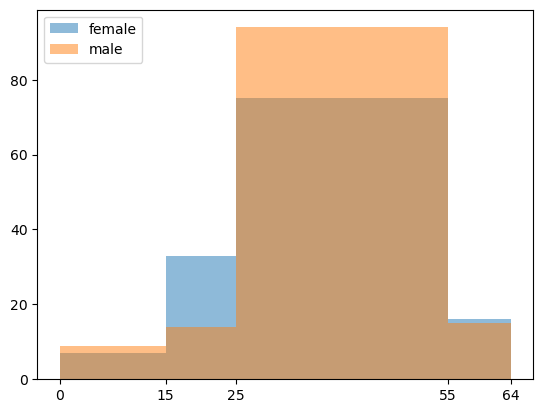

In [5]:
fig, ax = plt.subplots()
# only consider rows where we know the age
for label, gdf in df.groupby('sex'):
    ax.hist('age', bins=[0, 15,25, 55, 64], data=gdf, label=label, alpha=.5)
_ = ax.set_xticks([0, 15,25, 55, 64])
_ = ax.legend()

# Lets make things interactive

Just as in the [previous notebook](02_visual_variables.ipynb), we can link multiple graphs together via the sharex parameter.

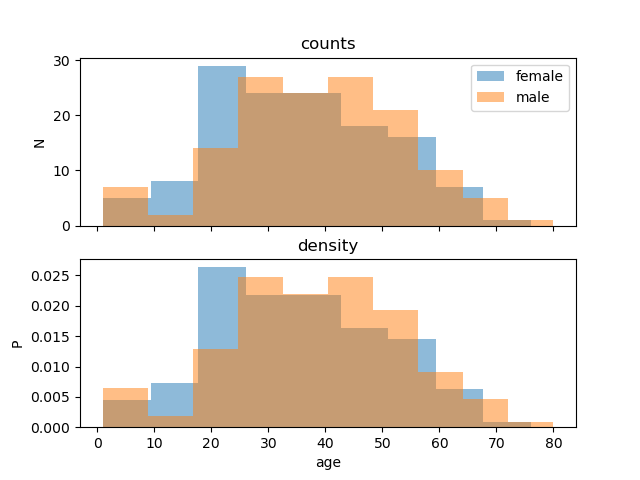

In [6]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# only consider rows where we know the age
for label, gdf in df.groupby('sex'):
    ax1.hist('age', bins='auto', data=gdf, label=label, alpha=.5)
    ax2.hist('age', bins='auto', data=gdf, label=label, alpha=.5, density=True)

_ = ax1.legend()
_ = ax1.set(title='counts', ylabel='N')
_ = ax2.set(title='density', ylabel='P', xlabel='age')

# What about bars and pies?

The titanic dataset has a bunch of categorical variables (sex, pclass, survival) that are fairly interesting. In particular, it would be useful to plot some counts of this data so that we can get a sense of how things like the ratios of people in each class.

## Lets get counts


Pandas has a very useful function called `.value_counts` that returns the frequencies of each measurement of a variable in a row. Here I want to compute who survived. 

In [8]:
survived = df['survived'].value_counts()
survived

survived
1    180
0     90
Name: count, dtype: int64

# Let's make a pie chart!

Pie charts show the ratios between different categories. The first argument to then pie chart is the wedge size (or data values). Like many of the other Matplotlib plotting routines, we can also pass in the colors and labels and [lots of other customizations](https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html). We access the values in the dataframe using the `.values` attribute

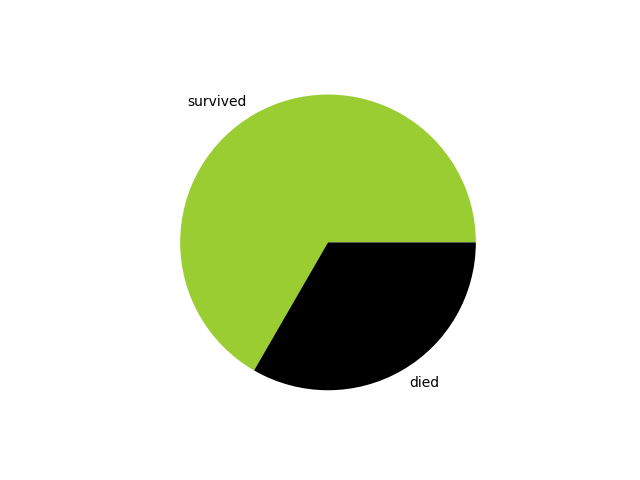

In [9]:
fig, ax =plt.subplots()
_ = ax.pie(x=survived.values, 
       labels=['survived', 'died'], colors=['yellowgreen', 'black'])

## Practice
What's the ratio of men to women? Display it using a pie chart

In [12]:
sex = df.sex.value_counts()
sex

sex
male      138
female    132
Name: count, dtype: int64

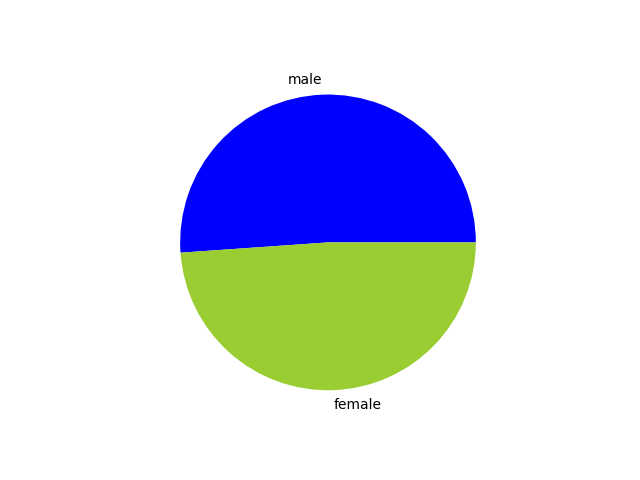

In [16]:
fig, ax = plt.subplots()
_ = ax.pie(x=sex.values, labels=['male', 'female'], colors=['Blue', 'yellowgreen'])

# Bar charts

Often we don't want the ratio of categories, but the counts. To do this, we create bar charts. Matplotlib supports [many different types](https://matplotlib.org/gallery/index.html#lines-bars-and-markers) of bar charts. Here we will illustrate vertical bar charts.

In [18]:
pclass = df['sex'].value_counts()
pclass

sex
male      138
female    132
Name: count, dtype: int64

Matplotlib supports strings as first class data, so we can plot the labels directly. We use the '.index' attribute to get the categories and the '.values' attribute to obtain the values.

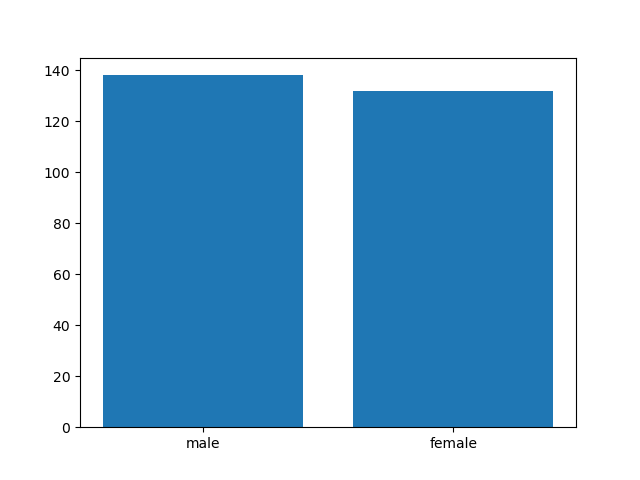

In [19]:
fig, ax = plt.subplots()
_ = ax.bar(pclass.index, pclass.values)

# Practice 
How many people are in each class and how do visualize that?

In [33]:
class_number = df.pclass.value_counts()

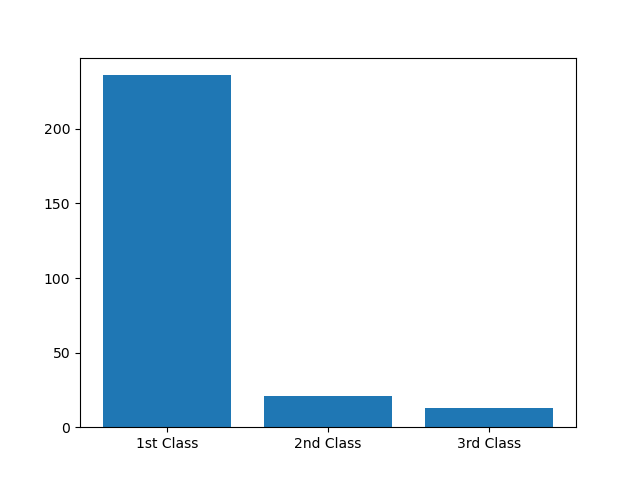

In [53]:
fig, ax = plt.subplots()
_ = ax.bar(class_number.index, class_number.values)
_ = ax.set_xticks([1,2,3])
_ = ax.set_xticklabels(['1st Class', '2nd Class','3rd Class'])

In [29]:
df.pclass.value_counts()


pclass
1    236
2     21
3     13
Name: count, dtype: int64